# PW3

## **Question 1**

In [18]:
import os
import nltk
nltk.download('stopwords')
import visualization as visu

 Start by running the program and understand the differents steps.

### 1.1 - Import data

In [19]:
import pandas as pd

data = pd.read_csv('train.csv').sample(50000, random_state=23)
STOP_WORDS = nltk.corpus.stopwords.words()

### 1.2 - Clean data

In [20]:
#1.2

data = visu.clean_dataframe(data)
data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
237921,237921,9732,79801,sex relationship,sex important relationship,1
181001,181001,277377,277378,inspiring start stories,inspirational stories,0
294691,294691,150129,93109,digital marketing,unique ways digital marketing,1
104145,104145,171986,171987,grow facebook page,followers facebook page,1
357893,357893,487310,487311,suppose host sends tcp segments back back host...,suppose host sends tcp segments back back host...,1


### 1.3 - Sentences to list of words

In [23]:
from gensim.models import word2vec

print(data.head(5))

corpus = visu.build_corpus(data)        
corpus[0:2]


model = word2vec.Word2Vec(corpus, vector_size=100, window=20, min_count=200, workers=4)
model.wv['trump']

vocab = []
for i in range(0,len(model.wv)):
        vocab.append(model.wv.index_to_key[i])

            id    qid1    qid2  \
237921  237921    9732   79801   
181001  181001  277377  277378   
294691  294691  150129   93109   
104145  104145  171986  171987   
357893  357893  487310  487311   

                                                question1  \
237921                                   sex relationship   
181001                            inspiring start stories   
294691                                  digital marketing   
104145                                 grow facebook page   
357893  suppose host sends tcp segments back back host...   

                                                question2  is_duplicate  
237921                         sex important relationship             1  
181001                              inspirational stories             0  
294691                      unique ways digital marketing             1  
104145                            followers facebook page             1  
357893  suppose host sends tcp segments back back host... 

### 1.4 - Dimension reduction with TSNE

/Users/mtissot/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/mtissot/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


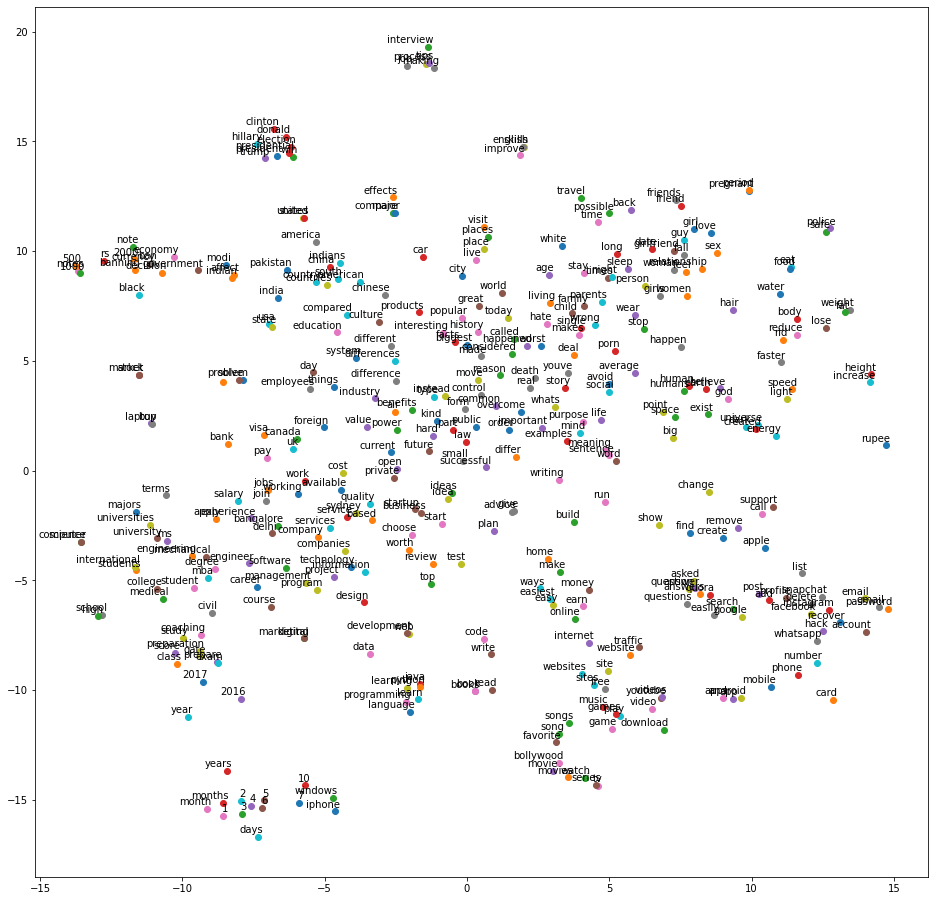

In [26]:
visu.tsne_plot(model)

## **Question 2**

 Start to design an Information Retrieval system using the dataset CNN

## 2.1 - Load data

In [2]:
import os
import sys
sys.path.insert(1,"CNN")
import loadCNN as cnn

In [5]:
articles, abstracts = cnn.loadCNN()

print("ARTICLE=\n\n",articles[0])
print("\n\nSUMMARY=\n\n",abstracts[0])


ARTICLE=

 turkey has blocked access to twitter and youtube after they refused a request to remove pictures of a prosecutor held during an armed siege last week . a turkish court imposed the blocks because images of the deadly siege were being shared on social media and ` deeply upset ' the wife and children of mehmet selim kiraz , the hostage who was killed . the 46-year-old turkish prosecutor died in hospital when members of the revolutionary people 's liberation party-front ( dhkp-c ) stormed a courthouse and took him hostage . the dhkp-c is considered a terrorist group by turkey , the european union and us . a turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week grief : the family of mehmet selim kiraz grieve over his coffin during his funeral at eyup sultan mosque in istanbul , turkey . he died in hospital after he was taken hostage by the far-left organisation 

In [8]:
len(articles)

11489

In [79]:
np.shape(articles)

(11489,)

### 2.2 Embed data

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer()

tfidf_articles  = tfidf_vectorizer.fit_transform(articles)
tfidf_abstracts = tfidf_vectorizer.transform(abstracts)

print("shape abstracts :",np.shape(tfidf_abstracts.toarray()))
print("shape articles  :",np.shape(tfidf_articles.toarray()))

shape abstracts : (11489, 90457)
shape articles  : (11489, 90457)


### 2.3 - Score 

In [31]:
from sklearn.metrics.pairwise import linear_kernel

scores = linear_kernel(tfidf_abstracts,tfidf_articles)

In [73]:
i = 10
print(f"- Abstract {i} :\n\n{abstracts[i]}")
print(f"\n\n- Best similarity of resumé {i} : {np.max(scores[i])}")
print(f"\n- Location of the best         : {np.argmax(scores[i])}")
print("\n")
print(f"- 10ème article :\n\n {articles[10]}")

- Abstract 10 :

truck stopped by police this morning after travelling 200m across the uk . police sniffer dog team found five men hiding in tiny space inside . it is thought they had climbed on board in belgium before entering britain . comes days after illegal camp in calais , france was closed down .


- Best similarity of resumé 10 : 0.4154562195284655

- Location of the best         : 10


- 10ème article :

 five afghan men were found hiding in the back of a refrigerated lorry after travelling 200 miles across britain . it is thought the migrants had climbed into the british-registered truck in belgium before crossing the channel and entering the uk illegally . police sniffer dogs were used to find them after officers opened the truck 's back doors on the a40 near churcham , gloucestershire . a group of afghan men discovered crammed in a refrigerated lorry in gloucestershire are removed by police photos taken by officers show the tiny space the men had climbed into between crates

## Find the best article for my request

In [106]:
request = "love dogs"
request = [request]

tfidf_request = tfidf_vectorizer.transform(request)
score_request = linear_kernel(tfidf_request,tfidf_articles)

np.shape(score_request)

(1, 11489)

In [108]:
print(f"- Best similarity of resumé : {np.max(score_request[0])}")
print(f"\n- Location of the best    : {np.argmax(score_request[0])}")
i = np.argmax(score_request[0])
print(f"- 10ème article :\n\n {articles[i]}")

- Best similarity of resumé : 0.46556158838545775

- Location of the best    : 3442
- 10ème article :

 a grandmother nicknamed the ` fairy dogmother ' spends more than # 28,000 a year looking after the stray or abandoned dogs she has welcomed into her home . for more than 30 years , pat senior , 66 , has shared her five-bedroom home in bolton , greater manchester , with the animals , taking in dogs from as far afield as romania and hungary . she estimates that she spends # 240 a week on food and treats for the dogs , with veterinary bills adding another # 17,000 to the yearly cost of caring for the pets . pat senior , 66 , ( pictured ) who is nicknamed the ` fairy dogmother ' , spends more than # 28,000 a year looking after as many as 26 stray or abandoned dogs she has welcomed into her home grandmother-of-four mrs senior and her businessman husband , charles , currently have 19 dogs in their care , including lurchers , german shepherds and chinese cresteds who all sleep and live at h

In [ ]:
#pickle parkey